## Challenge Set 2

Topic: Pandas - Explore Movie Data  
Date: 10/7/2016  
Name: Nils Hansen  

In [83]:
# imports a library 'pandas', names it as 'pd'
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
import seaborn as sns

from IPython.display import Image

# enables inline plots, without it plots don't show up in the notebook
%matplotlib inline

### 1. Plot total gross over time

In [84]:
#read csv file and check whether there are any values missing in total gross and runtime

df = pd.read_csv('2013_movies.csv')

max(df["ReleaseDate"].isnull().sum(), df["Runtime"].isnull().sum(),df["DomesticTotalGross"].isnull().sum())

0

In [85]:
# Transform Release date into datetime object and sort dataframe by time

df['ReleaseDate'] = pd.to_datetime(df.ReleaseDate)
df=df.sort_values('ReleaseDate')
df_date = df.groupby('ReleaseDate')['DomesticTotalGross'].sum().reset_index()

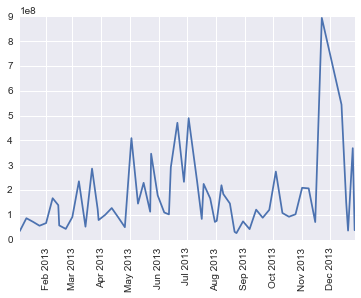

In [86]:
plt.xticks(rotation='vertical')
plt.plot(df_date['ReleaseDate'], df_date['DomesticTotalGross'])

### 2. Plot runtime vs. domestic gross

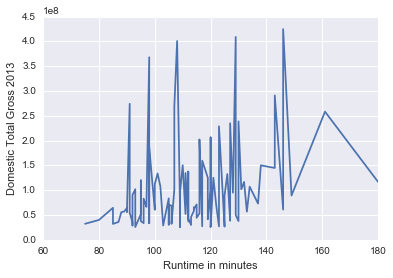

In [87]:
# Sort data frame by Runtime and plot graph

df=df.sort_values('Runtime',ascending=True)
df_runtime = df.groupby('Runtime')['DomesticTotalGross'].mean().reset_index()
plt.xlabel("Runtime in minutes")
plt.ylabel("Domestic Total Gross 2013")
plt.plot(df['Runtime'], df['DomesticTotalGross'])

### 3. Group your data by Rating and find the average runtime and domestic total gross at each level of Rating

In [88]:
df_rating = df.groupby('Rating')[["DomesticTotalGross", "Runtime"]].mean()
df_rating["AverageDomesticTotalGross"]=df_rating["DomesticTotalGross"]
df_rating["AverageRuntime"]=df_rating["Runtime"]
df_rating.drop(["DomesticTotalGross", "Runtime"], axis = 1)

,AverageDomesticTotalGross,AverageRuntime
Rating,,
G,2.684928e+08,107.000000
PG,1.311357e+08,99.933333
PG-13,1.114498e+08,117.510638
R,6.989243e+07,110.729730


### 4. Plot release date vs. domestic total gross per MPAA Rating

In [89]:
# Check on any missing values in release date

df["Runtime"].isnull().sum()

0

In [90]:
# create one date frame per rating

df.columns

Index([u'Title', u'Budget', u'DomesticTotalGross', u'Director', u'Rating',
       u'Runtime', u'ReleaseDate'],
      dtype='object')

In [91]:
df_R=df[(df["Rating"]=="R")].sort_values("ReleaseDate")
df_PG13=df[(df["Rating"]=="PG-13")].sort_values("ReleaseDate")
df_PG=df[(df["Rating"]=="PG")].sort_values("ReleaseDate")
df_G=df[(df["Rating"]=="G")].sort_values("ReleaseDate")

In [92]:
df_G

,Title,Budget,DomesticTotalGross,Director,Rating,Runtime,ReleaseDate
6,Monsters University,NaN,268492764,Dan Scanlon,G,107,2013-06-21


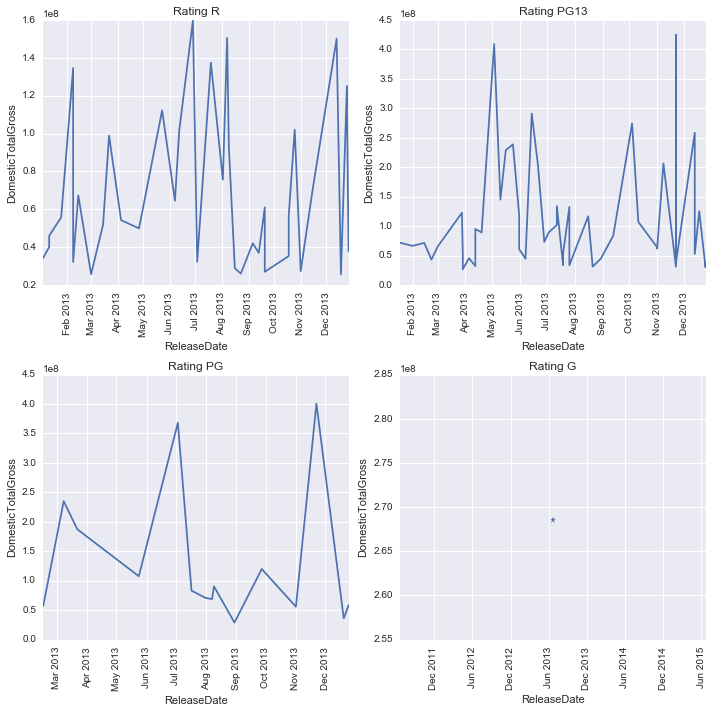

In [93]:
# plot graphs


fig, ax = plt.subplots(2, 2, figsize=(10, 10))


ax[0,0].plot(df_R["ReleaseDate"], df_R["DomesticTotalGross"])
ax[0,0].set_title('Rating R')
ax[0,0].set_xlabel('ReleaseDate')
ax[0,0].set_ylabel("DomesticTotalGross")


ax[0,1].plot(df_PG13["ReleaseDate"], df_PG13["DomesticTotalGross"])
ax[0,1].set_title('Rating PG13')
ax[0,1].set_xlabel('ReleaseDate')
ax[0,1].set_ylabel("DomesticTotalGross")

ax[1,0].plot(df_PG["ReleaseDate"], df_PG["DomesticTotalGross"])
ax[1,0].set_title('Rating PG')
ax[1,0].set_xlabel('ReleaseDate')
ax[1,0].set_ylabel("DomesticTotalGross")

ax[1,1].plot(df_G["ReleaseDate"], df_G["DomesticTotalGross"], marker='*')
ax[1,1].set_title('Rating G')
ax[1,1].set_xlabel('ReleaseDate')
ax[1,1].set_ylabel("DomesticTotalGross")

for ax in fig.axes:
    plt.sca(ax)
    plt.xticks(rotation=90)
    
plt.tight_layout()

### 5. Find out the Director with the higher gross per movie

In [94]:
df_dir = df.groupby("Director")["DomesticTotalGross"].mean().sort_values(ascending = False).reset_index()
df_dir['DomesticTotalGrossperMovie']=df_dir['DomesticTotalGross']
df_dir=df_dir.drop('DomesticTotalGross', axis=1)
df_dir.iloc[0]

Director                      Francis Lawrence
DomesticTotalGrossperMovie           424668047
Name: 0, dtype: object

### 6. Bar graph of the mean domestic total gross by month

In [95]:
# Create data frame with monthly date

df_month = df
df_month["ReleaseMonth"] = df.ReleaseDate.dt.month
df_month=df_month.groupby("ReleaseMonth")["DomesticTotalGross"].mean().reset_index()

In [96]:
yerror = df.groupby("ReleaseMonth")["DomesticTotalGross"].std().reset_index()

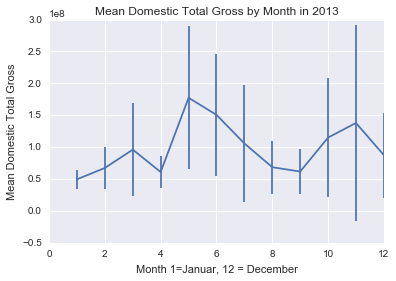

In [97]:
# plot bar chart

plt.title("Mean Domestic Total Gross by Month in 2013")
plt.xlabel("Month 1=Januar, 12 = December")
plt.ylabel("Mean Domestic Total Gross")
plt.errorbar(df_month["ReleaseMonth"], df_month["DomesticTotalGross"], yerr = yerror["DomesticTotalGross"]);